In [7]:
import pandas as pd 
bikes = pd.read_csv("./bikes.csv", index_col='datetime', parse_dates=True)
bikes.shape

(10886, 11)

In [2]:
bike.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2012-02-09 01:00:00,1,0,1,2,9.84,12.120,87,8.9981,2,10,12
2011-10-18 21:00:00,4,0,1,2,22.14,25.760,68,8.9981,28,178,206
2011-06-13 11:00:00,2,0,1,1,27.06,31.060,41,19.9995,53,106,159
2011-06-17 19:00:00,2,0,1,3,26.24,28.790,83,16.9979,53,275,328
2011-07-03 10:00:00,3,0,0,1,30.34,34.850,66,11.0014,131,133,264
2012-07-10 02:00:00,3,0,1,1,28.70,33.335,74,8.9981,1,15,16
2011-06-12 14:00:00,2,0,0,1,33.62,39.395,56,16.9979,96,219,315
2012-06-16 05:00:00,2,0,0,1,22.14,25.760,68,7.0015,2,21,23
2011-07-02 23:00:00,3,0,0,1,29.52,33.335,54,19.0012,66,88,154


In [8]:
bikes.rename(columns={'count':'Total'}, inplace=True)

In [9]:
bikes.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,Total
datetime,,,,,,,,,,,
2012-04-05 13:00:00,2,0,1,1,18.86,22.725,31,0.0000,89,202,291
2011-11-05 01:00:00,4,0,0,1,13.12,15.150,45,19.9995,5,57,62
2012-04-07 08:00:00,2,0,0,1,13.94,15.910,34,16.9979,29,94,123
2012-06-04 04:00:00,2,0,1,1,22.14,25.760,64,6.0032,2,6,8
2011-06-15 09:00:00,2,0,1,1,24.60,31.060,49,0.0000,22,185,207
2011-10-07 00:00:00,4,0,1,1,18.04,21.970,88,0.0000,19,48,67
2012-03-03 19:00:00,1,0,0,1,18.86,22.725,33,11.0014,34,191,225
2011-06-13 17:00:00,2,0,1,1,28.70,31.820,39,22.0028,72,529,601
2011-01-15 17:00:00,1,0,0,2,13.12,15.150,36,19.0012,29,54,83


In [6]:
feature_cols = []

In [10]:
feature_cols =['temp']
x=bikes[feature_cols]
y=bikes['Total']

In [11]:
from sklearn.linear_model import LinearRegression

In [13]:
linreg = LinearRegression()

In [14]:
linreg.fit(x,y)

LinearRegression()

In [15]:
print(linreg.intercept_)

6.046212959616611


In [16]:
print(linreg.coef_)

[9.17054048]


In [17]:
temp=25
linreg.intercept_+linreg.coef_*temp

array([235.309725])

In [19]:
import numpy as np 

test_sklearn=np.array(temp).reshape(-1,1)
linreg.predict(test_sklearn)

/Users/yadir/Desktop/Python platzy/Machinlearning/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([235.309725])

In [20]:
feature_cols= ["temp", "weather", "humidity"]
bikes[feature_cols].corr()

,temp,weather,humidity
temp,1.000000,-0.055035,-0.064949
weather,-0.055035,1.000000,0.406244
humidity,-0.064949,0.406244,1.000000


In [23]:
import seaborn as sns


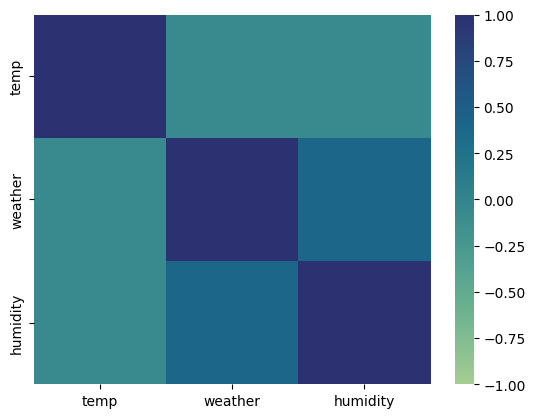

In [26]:
sns.heatmap(bikes[feature_cols].corr(), vmin=-1,vmax=1,center=0,cmap="crest");


In [27]:
x=bikes[feature_cols]
y=bikes.Total

linReg = LinearRegression()
linReg.fit(x,y)

print(linReg.intercept_)
print(linReg.coef_)

183.2396939085996
[ 8.73698147  3.77938867 -2.80809402]


In [28]:
list(zip(feature_cols, linReg.coef_))

[('temp', np.float64(8.736981468839677)),
 ('weather', np.float64(3.779388671757466)),
 ('humidity', np.float64(-2.8080940236753613))]

In [29]:
true = [28, 7, 3, 17, 28, 16, 15, 1, 20, 4]
pred = [23, 8, 23, 22, 9, 27, 21, 16, 2, 11]

In [30]:
from sklearn import metrics
import numpy as np

In [32]:
print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(true,pred))
print("Mean Squared Erro (MSE): ", metrics.mean_squared_error(true,pred))
print("Root Mean Squared Error  (RMSE): ",np.sqrt(metrics.mean_squared_error(true,pred)))
print("R2: ", metrics.r2_score(true,pred))


Mean Absolute Error (MAE):  10.7
Mean Squared Erro (MSE):  156.7
Root Mean Squared Error  (RMSE):  12.517987058628874
R2:  -0.7788625269610623


In [33]:
from sklearn.model_selection import train_test_split

In [35]:
def train_test_error(feature_cols):
    x=bikes[feature_cols]
    y=bikes.Total
    x_train, x_test, y_train, y_test =train_test_split(x,y,shuffle=False)
    linReg= LinearRegression()
    linReg.fit(x_train, y_train)
    y_pred=linReg.predict(x_test)

    print(feature_cols)
    print("Y test sample: ", y_test.values[0:10])
    print("Y pred sample: ", y_pred[0:10].astype(int))
    print("Mean Absolute Error (MAE): ", metrics.mean_absolute_error(y_test,y_pred))
    print("Mean Squared Erro (MSE): ", metrics.mean_squared_error(y_test,y_pred))
    print("Root Mean Squared Error  (RMSE): ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print("R2: ", metrics.r2_score(y_test,y_pred))
    print()
    return



In [37]:
train_test_error(['temp','humidity'])

['temp', 'humidity']
Y test sample:  [420 444 345 313 413 370 382 332 258 151]
Y pred sample:  [394 394 377 394 411 382 351 351 351 334]
Mean Absolute Error (MAE):  154.60330484672807
Mean Squared Erro (MSE):  44002.98797986699
Root Mean Squared Error  (RMSE):  209.7688918306692
R2:  0.05953123509528524

